In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


**Data** **Preprocessing**

In [4]:
pharma_data.sum()

ID_Patient_Care_Situation                                            382156311
Diagnosed_Condition                                                     610064
Patient_ID                                                           144616802
Patient_Age                                                             767046
Patient_Body_Mass_Index                                                 541736
Patient_Smoker               YESYESYESNOCannot sayYESNONONONOYESYESYESNOYES...
Patient_Rural_Urban          URBANRURALRURALURBANRURALURBANRURALURBANURBANR...
Patient_mental_condition     StableStableStableStableStableStableStableStab...
A                                                                        19630
B                                                                         2981
C                                                                         4046
D                                                                         1828
E                                                   

In [5]:
pharma_data.shape

(23097, 18)

In [6]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [7]:
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


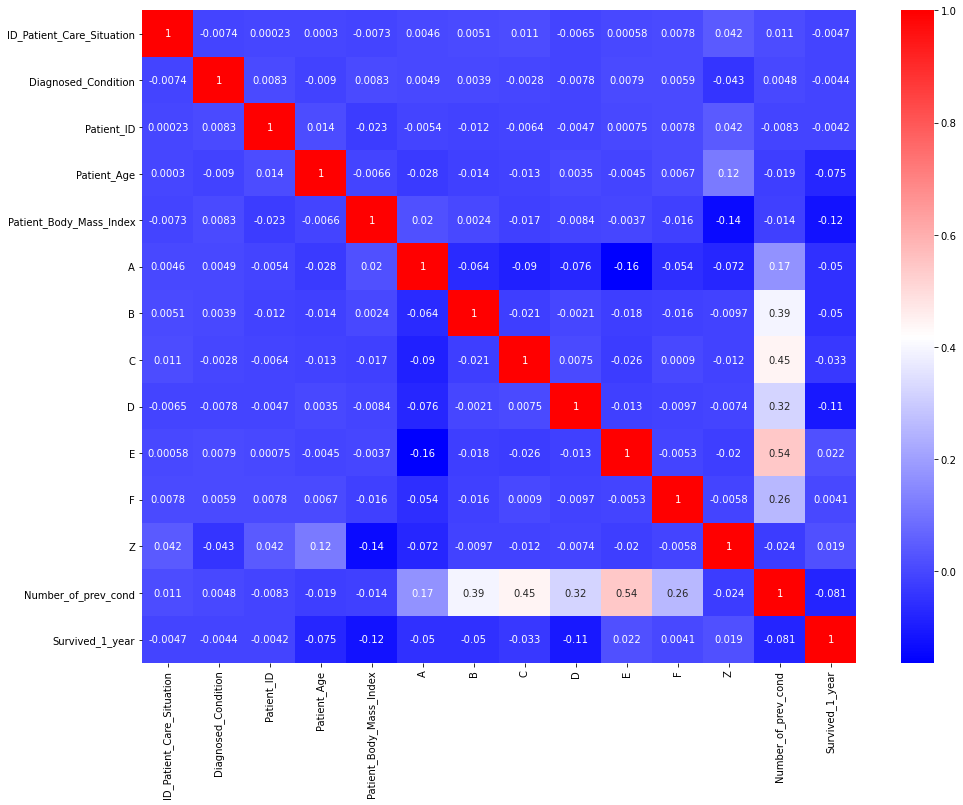

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(pharma_data.corr(), cmap='bwr', annot=True) 

In [9]:
pharma_data.Number_of_prev_cond.unique()

array([ 2.,  1.,  3.,  4., nan,  5.])

In [10]:
pharma_data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [11]:
pharma_data.Number_of_prev_cond.value_counts()

1.0    9386
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: Number_of_prev_cond, dtype: int64

In [12]:
sp = pharma_data[pharma_data.Survived_1_year == 1]
sp.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


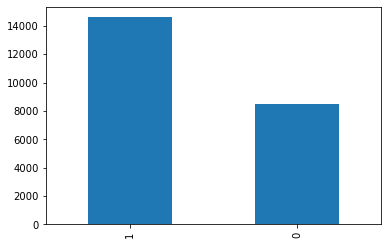

In [13]:
pharma_data.Survived_1_year.value_counts().plot(kind = 'bar')

In [14]:
count = 0
for i in range(0,23097):
    if pharma_data.Patient_Smoker[i] == "Cannot say":
        count = count + 1
print(count) 

13


In [15]:
count = 0
for i in range(0,23097):
    if pharma_data.Patient_mental_condition[i] == "Stable":
        count = count + 1
print(count) 

23097


In [16]:
pharma_data.Survived_1_year.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

In [17]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [18]:
pharma_data['Patient_Smoker'] = pharma_data['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)

In [19]:
pharma_data['Patient_mental_condition'] = pharma_data['Patient_mental_condition'].apply(lambda y: 1 if y == 'Stable' else 0)

In [20]:
pharma_data['Patient_Rural_Urban'] = pharma_data['Patient_Rural_Urban'].apply(lambda y: 1 if y == 'URBAN' else 0)

In [21]:
pharma_data = pd.get_dummies(pharma_data, columns=['Treated_with_drugs'])

In [22]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,22374,8,3333,56,18.479385,1,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,1,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,6283,23,10446,48,27.510027,1,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,0,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,33012,0,12513,128,1.348400,0,0,1,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                23097 non-null  int64  
 1   Diagnosed_Condition                      23097 non-null  int64  
 2   Patient_ID                               23097 non-null  int64  
 3   Patient_Age                              23097 non-null  int64  
 4   Patient_Body_Mass_Index                  23097 non-null  float64
 5   Patient_Smoker                           23097 non-null  int64  
 6   Patient_Rural_Urban                      23097 non-null  int64  
 7   Patient_mental_condition                 23097 non-null  int64  
 8   A                                        21862 non-null  float64
 9   B                                        21862 non-null  float64
 10  C                                        21862

In [24]:
pd.isnull(pharma_data).sum() > 0

ID_Patient_Care_Situation                  False
Diagnosed_Condition                        False
Patient_ID                                 False
Patient_Age                                False
Patient_Body_Mass_Index                    False
Patient_Smoker                             False
Patient_Rural_Urban                        False
Patient_mental_condition                   False
A                                           True
B                                           True
C                                           True
D                                           True
E                                           True
F                                           True
Z                                           True
Number_of_prev_cond                         True
Survived_1_year                            False
Treated_with_drugs_DX1                     False
Treated_with_drugs_DX1 DX2                 False
Treated_with_drugs_DX1 DX2 DX3             False
Treated_with_drugs_D

In [25]:
pharma_data = pharma_data.dropna()

In [26]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21862 entries, 0 to 23096
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                21862 non-null  int64  
 1   Diagnosed_Condition                      21862 non-null  int64  
 2   Patient_ID                               21862 non-null  int64  
 3   Patient_Age                              21862 non-null  int64  
 4   Patient_Body_Mass_Index                  21862 non-null  float64
 5   Patient_Smoker                           21862 non-null  int64  
 6   Patient_Rural_Urban                      21862 non-null  int64  
 7   Patient_mental_condition                 21862 non-null  int64  
 8   A                                        21862 non-null  float64
 9   B                                        21862 non-null  float64
 10  C                                        21862

**deviding into input and target variable**

In [27]:
X = pharma_data.drop(['Survived_1_year'], axis = 1)   
y = pharma_data.Survived_1_year  

**Splitting the data into test and train set**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
from tpot import TPOTClassifier
from sklearn.metrics import f1_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='f1',
    random_state=42,
    disable_update_check=True,
    
)
tpot.fit(X_train, y_train)


# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Generation 1 - Current best internal CV score: 0.8523102207770099

Generation 2 - Current best internal CV score: 0.8523102207770099

Generation 3 - Current best internal CV score: 0.8602795826022083

Generation 4 - Current best internal CV score: 0.8602795826022083

Generation 5 - Current best internal CV score: 0.8602795826022083

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.35000000000000003, min_samples_leaf=9, min_samples_split=2, n_estimators=100, subsample=0.6000000000000001)

Best pipeline steps:
1. GradientBoostingClassifier(max_depth=8, max_features=0.35000000000000003,
                           min_samples_leaf=9, random_state=42,
                           subsample=0.6000000000000001)


**Building Model**

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(max_depth=8, max_features=0.35000000000000003,
                           min_samples_leaf=9, random_state=42,
                           subsample=0.6000000000000001)

In [60]:
classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features=0.35000000000000003,
                           min_samples_leaf=9, random_state=42,
                           subsample=0.6000000000000001)

**Predicting the Test set results**

In [61]:
y_test.values

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [62]:
predictions = classifier.predict(X_test)

In [63]:
predictions

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

**Evaluating Model Performance**

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1819,  628],
       [ 535, 3577]], dtype=int64)

In [65]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.8601659252134183

**Predicting the result for new dataset**

In [66]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [67]:
test_new

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,DX6,28,29.106314,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,DX1,4,20.616673,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,DX1 DX3 DX4 DX5,20,24.727357,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,DX4,33,17.517426,NO,URBAN,Stable,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


In [68]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [69]:
test_new.Treated_with_drugs.value_counts()

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX3 DX4               41
DX1 DX2 DX5               41
DX1 DX2 DX3               40
DX2 DX3 DX4               40
DX3 DX4 DX5               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX1 DX2 DX4 DX5            8
DX2 DX3 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: Treated_with_drugs, dtype: int64

In [70]:
test_new['Patient_Smoker'] = test_new['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)

In [71]:
test_new['Patient_mental_condition'] = test_new['Patient_mental_condition'].apply(lambda y: 1 if y == 'Stable' else 0)

In [72]:
test_new['Patient_Rural_Urban'] = test_new['Patient_Rural_Urban'].apply(lambda y: 1 if y == 'URBAN' else 0)

In [73]:
test_new = pd.get_dummies(test_new, columns=['Treated_with_drugs'])

In [74]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,19150,40,3709,16,29.443894,0,0,1,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,23216,52,986,24,26.836321,0,1,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7149,32,3292,42,27.171155,0,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,0,0,1,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
test_new.dropna()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,19150,40,3709,16,29.443894,0,0,1,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,23216,52,986,24,26.836321,0,1,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7149,32,3292,42,27.171155,0,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,0,0,1,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,28,29.106314,0,0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
9299,15598,7,6273,4,20.616673,0,1,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
9300,11885,16,11473,20,24.727357,1,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9301,25101,50,5681,33,17.517426,0,1,1,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,...,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,19150,40,3709,16,29.443894,0,0,1,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,23216,52,986,24,26.836321,0,1,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7149,32,3292,42,27.171155,0,1,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,0,0,1,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
pd.isnull(test_new).sum() > 0

ID_Patient_Care_Situation                  False
Diagnosed_Condition                        False
Patient_ID                                 False
Patient_Age                                False
Patient_Body_Mass_Index                    False
Patient_Smoker                             False
Patient_Rural_Urban                        False
Patient_mental_condition                   False
A                                          False
B                                          False
C                                          False
D                                          False
E                                          False
F                                          False
Z                                          False
Number_of_prev_cond                        False
Treated_with_drugs_DX1                     False
Treated_with_drugs_DX1 DX2                 False
Treated_with_drugs_DX1 DX2 DX3             False
Treated_with_drugs_DX1 DX2 DX3 DX4         False
Treated_with_drugs_D

In [78]:
test_new.isnull().sum()

ID_Patient_Care_Situation                  0
Diagnosed_Condition                        0
Patient_ID                                 0
Patient_Age                                0
Patient_Body_Mass_Index                    0
Patient_Smoker                             0
Patient_Rural_Urban                        0
Patient_mental_condition                   0
A                                          0
B                                          0
C                                          0
D                                          0
E                                          0
F                                          0
Z                                          0
Number_of_prev_cond                        0
Treated_with_drugs_DX1                     0
Treated_with_drugs_DX1 DX2                 0
Treated_with_drugs_DX1 DX2 DX3             0
Treated_with_drugs_DX1 DX2 DX3 DX4         0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5     0
Treated_with_drugs_DX1 DX2 DX3 DX5         0
Treated_wi

In [79]:
survival_output = classifier.predict(test_new)

In [80]:
survival_output

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [81]:
res = pd.DataFrame(survival_output) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally

res.to_csv('submission.csv')         
